<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/DL_Binary_Classification_Bank_note_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/data_banknote_authentication.txt"
data = pd.read_csv(data_path,header=None)


In [4]:
Column_Names=['var','skewness','kurtosis','entropy','class']
data.columns = Column_Names

In [5]:
data.head()

,var,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


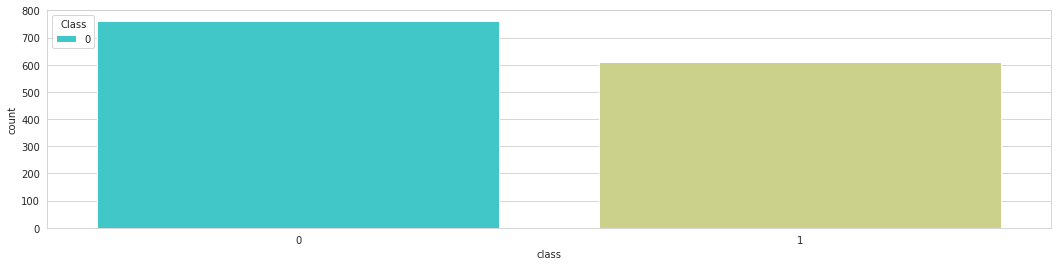

In [6]:
#Distribution of the classes
sns.set_style('whitegrid')
plt.figure(figsize=(18, 4))
sns.countplot(x=data['class'],data=data,palette='rainbow')
plt.legend(title='Class', loc='upper left', labels=['0', '1'])


In [7]:
#5-Point summary 
data.describe()

,var,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


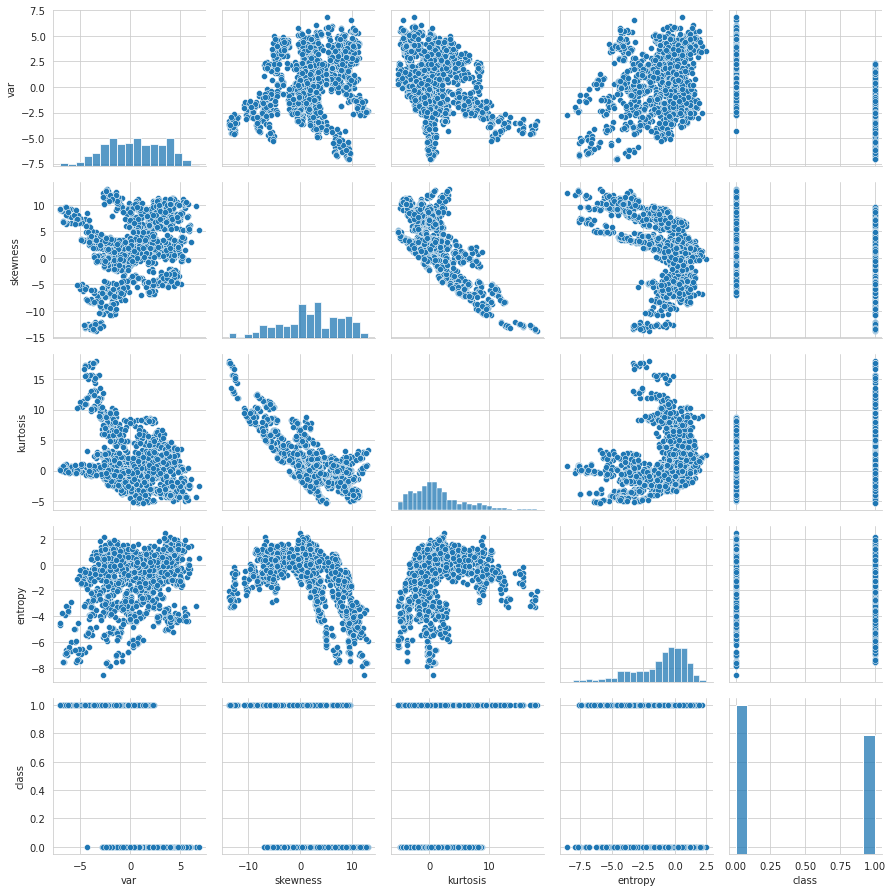

In [8]:
# Calculate and show pairplot
sns.pairplot(data, size=2.5)
plt.tight_layout()

In [9]:
#Selecting the features
X = data.drop(['class'],axis=1) 

In [10]:
#Selecting the targets
Y = data['class'] 

In [11]:
#Splitting into testing and training dataset
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.10,random_state =2)

In [12]:
#Importing required libraries for the Deep learning model
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


In [13]:
#Creating the model for classification
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),

])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
#Training
model.fit(x_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/50
1234/1234 [==============================] - 2s 1ms/step - loss: 0.2464 - accuracy: 0.8865
Epoch 2/50
1234/1234 [==============================] - 1s 1ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 3/50
1234/1234 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 4/50
1234/1234 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/50
1234/1234 [==============================] - 1s 1ms/step - loss: 9.8570e-04 - accuracy: 1.0000
Epoch 6/50
1234/1234 [==============================] - 1s 1ms/step - loss: 3.3226e-04 - accuracy: 1.0000
Epoch 7/50
1234/1234 [==============================] - 1s 1ms/step - loss: 1.8095e-04 - accuracy: 1.0000
Epoch 8/50
1234/1234 [==============================] - 1s 1ms/step - loss: 8.7740e-05 - accuracy: 1.0000
Epoch 9/50
1234/1234 [==============================] - 1s 1ms/step - loss: 4.5151e-05 - accuracy: 1.0000
Epoch 10/50
1234/1234 [==============================] - 1s 1m

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [17]:
#MSE & RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))


5.562668489752035e-10
3.4476355706912527e-09
